# Logistic Regression

You are provided with a dataset available in the Google Drive folder at the following link:
https://drive.google.com/drive/folders/1NB2zIk679jlZC1x0gZPS4ugfHIO1aq1p

The dataset contains information related to social network advertisements, including user attributes such as age and estimated salary, along with a binary target variable indicating whether a user purchased the advertised product or not.

The goal is to build a Logistic Regression classification model to predict whether a user will purchase the advertised product based on their Age and Estimated Salary.

Perform the following tasks:

## Importing the libraries

In [ ]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df.head()#df.head() was used to check if the dataset imported is the right one or not.

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Select Features and Target Variable



In [ ]:
x=df.iloc[:,[2,3]];
y=df.iloc[:, -1];

## Splitting the dataset into the Training set and Test set

In [ ]:
x=df.iloc[:,[2,3]];
y=df.iloc[:, -1];
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

## Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = num.meshgrid(num.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     num.arange(start = X_set[:, 1].min() - 500, stop = X_set[:, 1].max() + 500, step = 0.25))

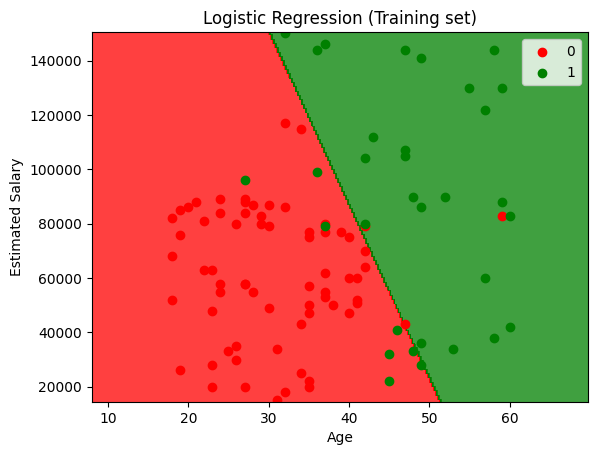

In [ ]:
plt.contourf(X1, X2, classifier.predict(sc.transform(num.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(num.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Visualising the Test set results

In [ ]:
import numpy as num
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = num.meshgrid(num.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     num.arange(start = X_set[:, 1].min() - 500, stop = X_set[:, 1].max() + 500, step = 0.25))

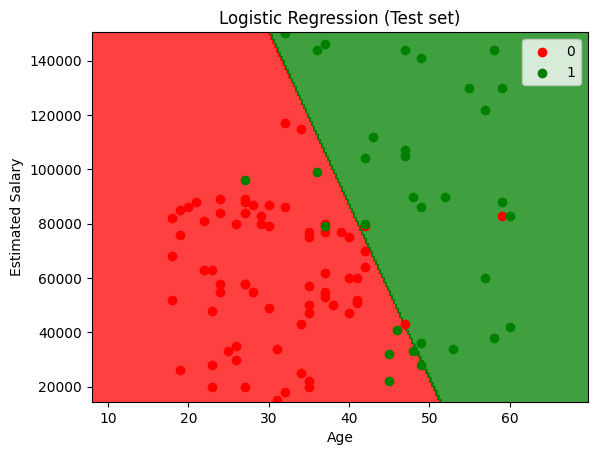

In [ ]:
plt.contourf(X1, X2, classifier.predict(sc.transform(num.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(num.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()